<a href="https://colab.research.google.com/github/mateusopaiva/modelos-classificacao-regressao/blob/main/1_modelos_de_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

### Exploramdo o daset

In [ ]:
mnist = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(float)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([5., 0., 4., ..., 4., 5., 6.])

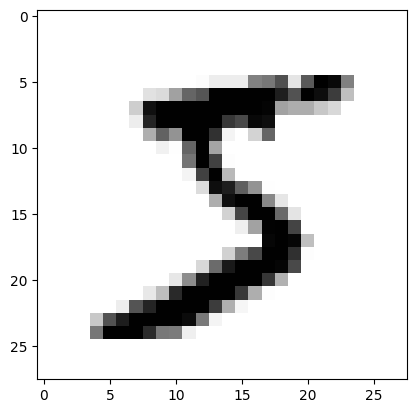

In [ ]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

### Classificador binário

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
y_train_5 = (y_train == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


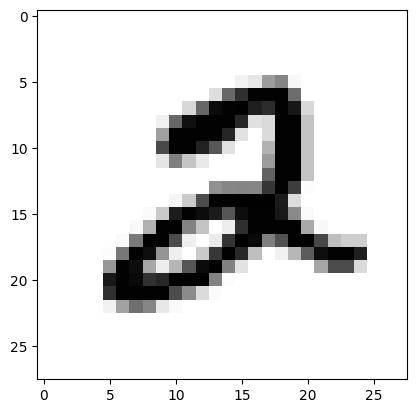

In [ ]:
n = 5
plt.imshow(x[n].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96198114, 0.96638707, 0.96926468])

### A matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[42814,  1723],
       [  546,  3917]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.6945035460992908
Recall:  0.8776607663006946


In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[42814  1723]
 [  546  3917]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.97     44537
        True       0.69      0.88      0.78      4463

    accuracy                           0.95     49000
   macro avg       0.84      0.92      0.87     49000
weighted avg       0.96      0.95      0.96     49000



### Classificação multiclasse

In [ ]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4667    0   26    9   12   14   18    5   50   11]
 [   1 5372   52    9    6   19    3   15   40   11]
 [  78   89 4223   93   60   15   52   75  177   18]
 [  72   31  174 4192   10  139   22   61  169  130]
 [  20   21   64   11 4280   15   37   23   79  218]
 [ 133   21   77  273   55 3361  104   25  310  104]
 [  87   19  129    8   36   70 4424    8   39    1]
 [  24   19   92   21   51   11    2 4608   33  264]
 [  84  124  248  124   32  150   35   47 3750  174]
 [  38   21   41   62  196   51    1  227  115 4083]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      4812
         1.0       0.94      0.97      0.96      5528
         2.0       0.82      0.87      0.84      4880
         3.0       0.87      0.84      0.86      5000
         4.0       0.90      0.90      0.90      4768
         5.0       0.87      0.75      0.81      4463
         6.0       0.94      0.92      0.93      4821
         7.0       0.90      0.90   

<Axes: >

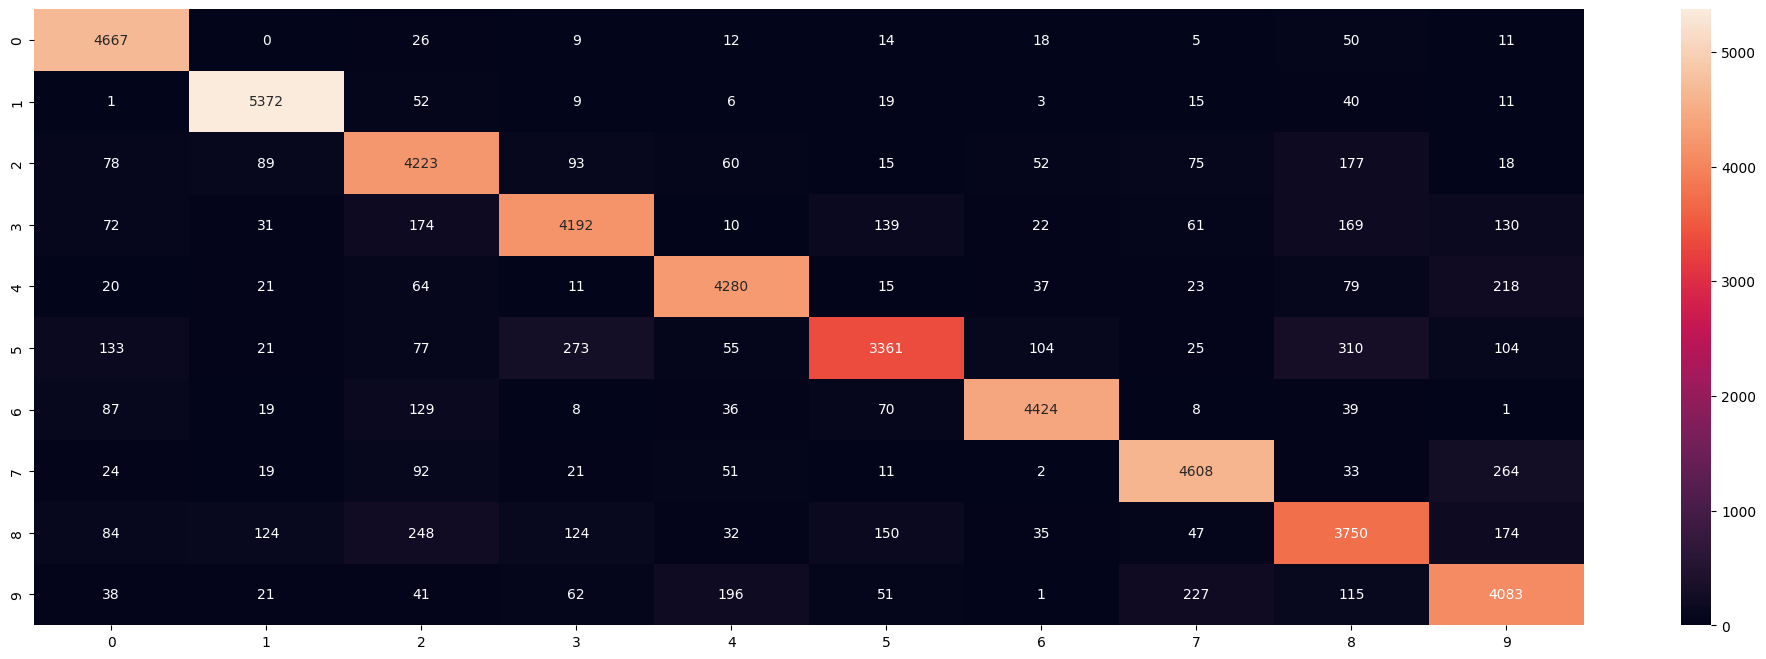

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<Axes: >

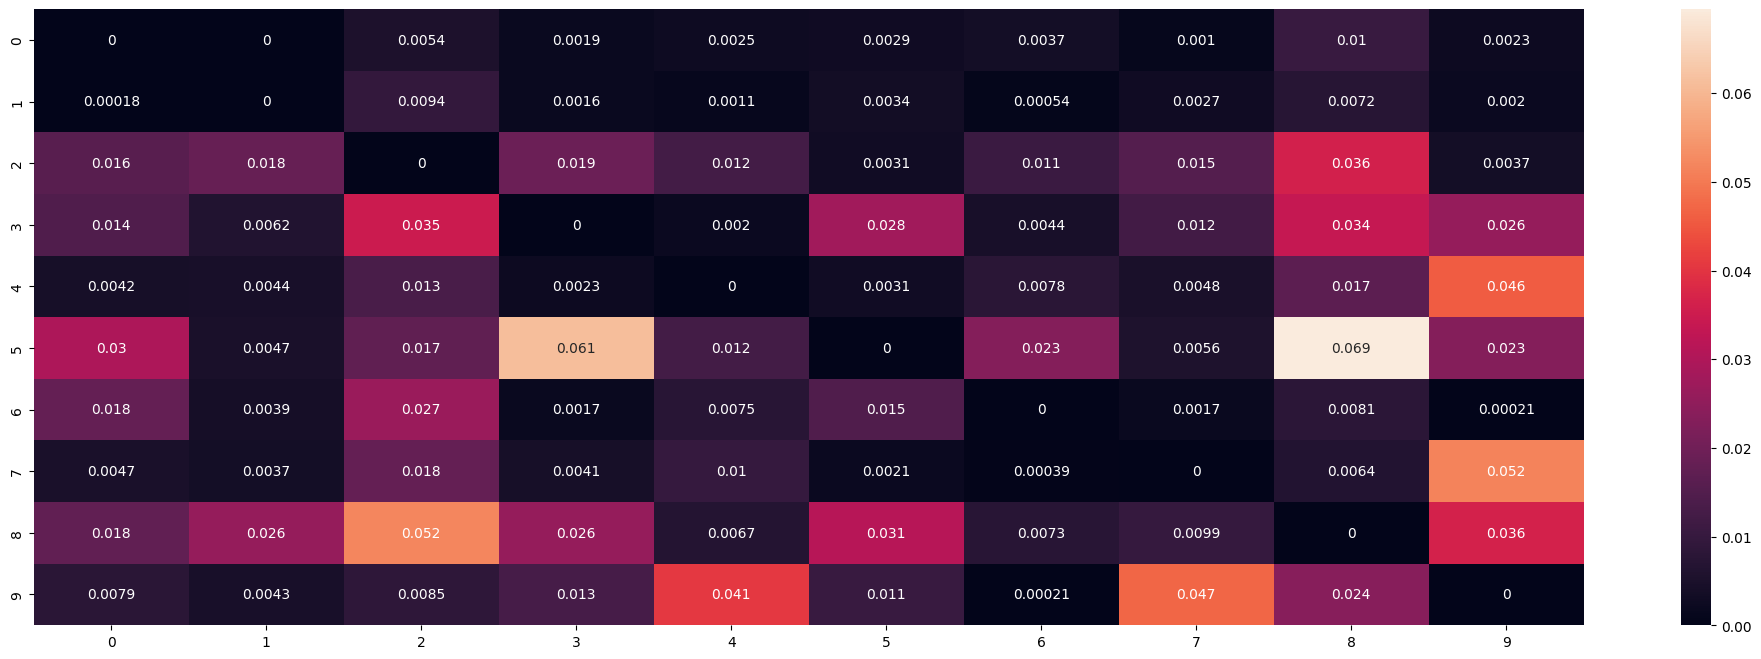

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [24]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

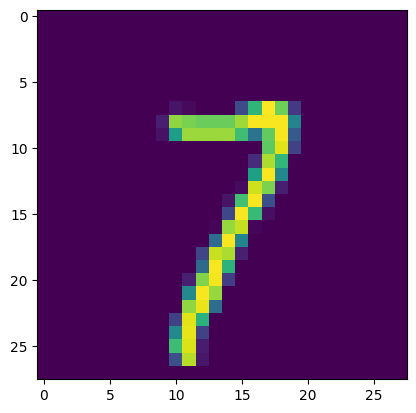

In [29]:
n = 4

digit = x_train[n]
plt.imshow(digit.reshape(28, 28))

In [26]:
knn_clf.predict([digit])

array([[ True,  True]])